<font size=7>Bluegill</font>

___Author:___ Umut Berkay Altintas <br>
___Date:___ 02 Nov 2022<br>

The bluegill is a python package to explore the epigenomic signal, such as ChIP-seq, ATAC-seq etc. There are two modules to `run` and `plt` (visualize).  

```
.
+--> bluegill
|  +--> run
|  |  +--> runSignal
|  |  +--> runSignal
|  +--> plt
|  |  +--> plotHeatmaps
|  |  +--> plotTracks

```
The run module contains functions to handle the data.
The plt module contains functions to plot the epigenomic signal.


<font size=5>Import modules</font>


In [1]:
import sys
sys.path.append("/home/ualtintas/bluegill/")

In [2]:
import bluegill.run as bgrun
import bluegill.plt as bgplt

In [3]:
import pickle

import pandas as pd
import numpy as np
import matplotlib as plt


<font size=5>Import BED and BIGWIG files</font>


In [4]:
BED = pd.read_table("data/bed/ALL.hg38.chr1.bed", names=["Chr", "Start","End","Set"])

# or
BED = {
    "rnd" : "data/bed/rnd.bed",
    "GR" : "data/bed/GR.bed"
}
BED = bgrun.runBed(BED)

BWS = [
    "data/bw/A549.GR.0h-DEX.hg38.chr1.10kb.bw",
    "data/bw/A549.GR.4h-DEX.hg38.chr1.10kb.bw"
]

In [5]:
BED

,Chr,Start,End,Set
0,chr1,647494,647974,rnd
1,chr1,769525,770005,rnd
2,chr1,822868,823348,rnd
3,chr1,842547,843027,rnd
0,chr1,943072,943552,GR
...,...,...,...,...
610,chr1,246583566,246584046,GR
611,chr1,246617939,246618059,GR
428,chr1,246679046,246679526,rnd
429,chr1,246801698,246801984,rnd


<font size=6>Run</font>

This module allows us to collect the signal intensities (form multiple `BIGWIG`) on multiple genomic loci (from a `BED`).
- `runSignal`: is a function to collect signal into `N` bins with `nP` multiproccessing cores.
   - __Default__: Collects signal of +/- `h` bp into same-sized bins (view-point center)
   - `scaled=True`: Collects signal from the entire loci (view-point loci) <br> - `h` is the extentions
   - `igv=True`: Allows bp resolution according to Nbins 

In [6]:

Nbins=200
h=1000

BED, samples = bgrun.runSignal(BED, BWS, "Example1.p",  Nbins=Nbins, h=h, nP=20)

0: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 1: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 2: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 3: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 4: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 5: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 6: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 7: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 8: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 9: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 10: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 11: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 12: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 13: A549.GR.0h-DEX.hg38.chr1.10kb.bw ::  :: 14: A549.GR.0h-DEX.hg38.chr1.10kb.bw15: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 16: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 17: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 18: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 19: A549.GR.0h-DEX.hg38.chr1.10kb.bw :: 4: A549.GR.4h-DEX.hg38.chr1.10kb.bw :: 1: A549.GR.4h-DEX.hg38.chr1.10kb.bw :: 2: A549.GR.4h-DEX.hg38.chr1.10kb.bw :: 5: A549.GR.4h-DEX.hg38.chr1.10kb.bw :: 3: A549.GR.4h-DEX.hg38.chr1.10kb.bw :: 8: A549.GR.4h-D

<font size=5>Prepare metadata</font>

You need to prepare the data to be visualized
1. Load the pickle-file we generated with runSignal function.
2. Sample names of BIGWIG files in a list.
3. Colormap for each heatmap columns (each BW)
4. Different sets of genomic-loci (BED)

In [7]:
S = pickle.load(open("Example1.p","rb"))

samples = [
    "GR-ChIPseq.0h-DEX",
    "GR-ChIPseq.4h-DEX",
]
palette = ["Reds", "Reds"]

sets = ["GR","rnd"]

colorPalette = {
    "rnd" : "#545c5e",
    "GR"  : "#FF7247"
}

<font size=6>Plot</font>

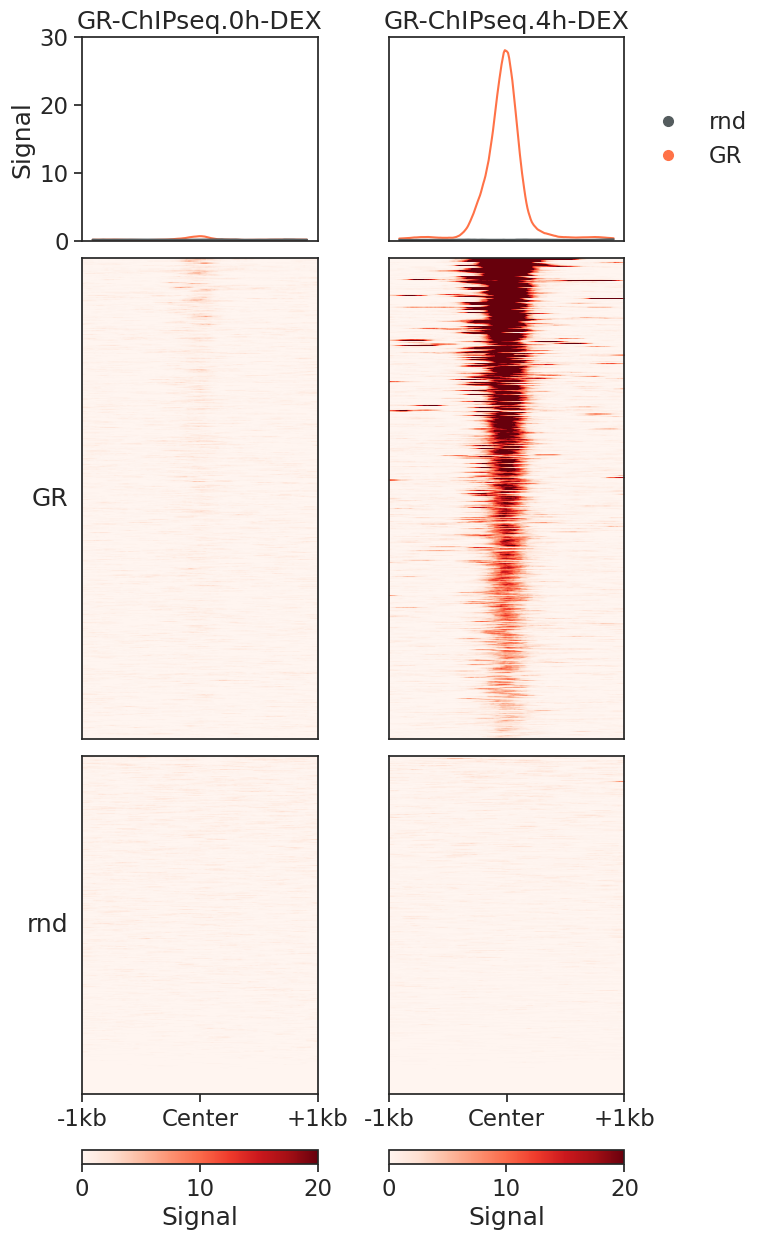

In [10]:
vmax = 20
vmin = 0

fig = bgplt.plotHeatmaps(
    S, BED,
    samples, palette, sets, colorPalette,
    ylim=(0,30),vmin=vmin,vmax=vmax,
    h=1000, dpi=100
)

<font size=6>TMM Normalization</font>

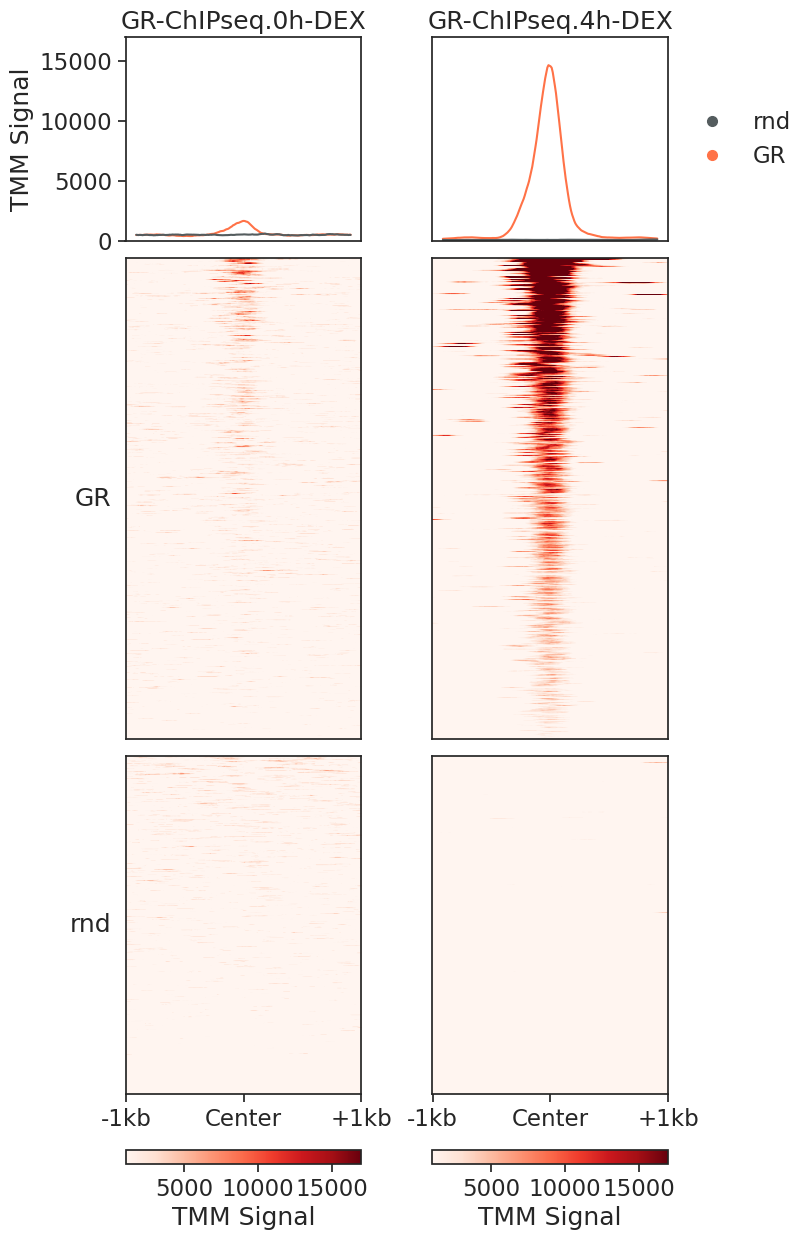

In [9]:
N = bgrun.runTMM(S)

vmax = 17000
vmin = 1000

fig = bgplt.plotHeatmaps(
    N, BED,
    samples, palette, sets, colorPalette,
    clab="TMM Signal", ylim=(0,vmax),vmin=vmin,vmax=vmax,
    h=1000, dpi=100
)